In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits  # 🔢 Using Digits dataset 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd


In [2]:
# Load Digits dataset 🔢
digits = load_digits()
X, y = digits.data, digits.target

In [3]:
# Create DataFrame for exploration
df = pd.DataFrame(X)
df['target'] = y

In [4]:
# Display basic info
print("Dataset Shape:", X.shape)
print("Classes:", np.unique(y))
df.head()

Dataset Shape: (1797, 64)
Classes: [0 1 2 3 4 5 6 7 8 9]


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


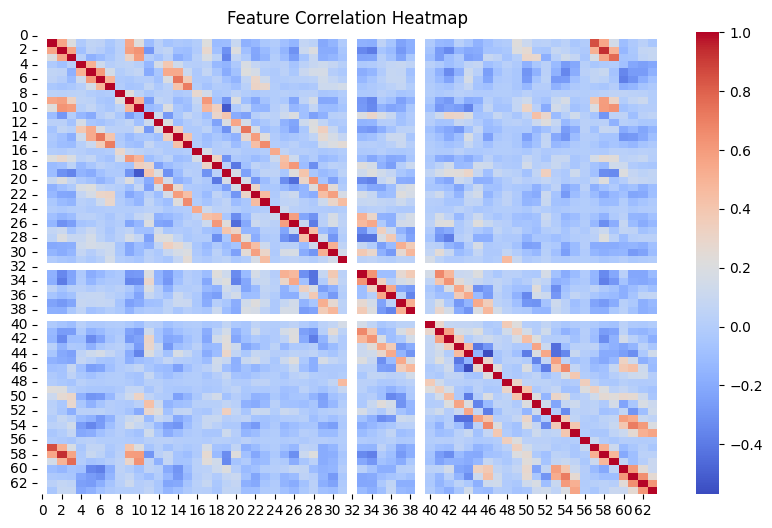

In [5]:
# Heatmap to visualize feature correlations 🔥
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
# Split into training and testing sets 🏋️
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize the data ⚖️
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# Train an MLP Classifier 🧠
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=42)

In [9]:
# Predictions 🔮
y_pred = mlp.predict(X_test)

In [10]:
# Model Evaluation 📊
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9805555555555555

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      1.00      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



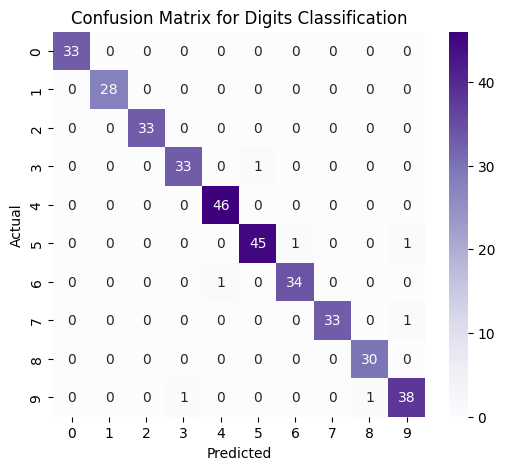

In [11]:
# Confusion Matrix Visualization 🎭
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Purples', fmt='d')
plt.title("Confusion Matrix for Digits Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()